Shruthi Gangam(21BCB0063)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [40]:
df=pd.read_csv("/content/Mall_Customers.csv")
copy_df=df

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [42]:
df.shape

(200, 5)

In [43]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [45]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Visualization

Univariant Analysis

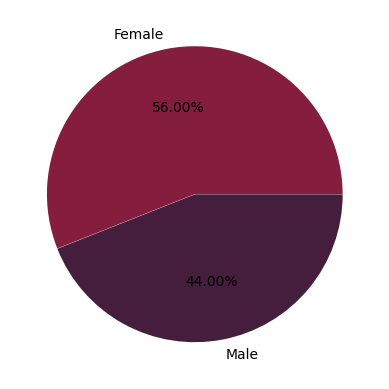

In [46]:
plt.pie(df['Gender'].value_counts(),autopct='%0.2f%%',colors=['#851e3e','#451e3e'],labels=df['Gender'].value_counts().keys(),explode=[0.001,0.001])
plt.show()

<ipython-input-47-cdbd4b8fb726>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sea.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

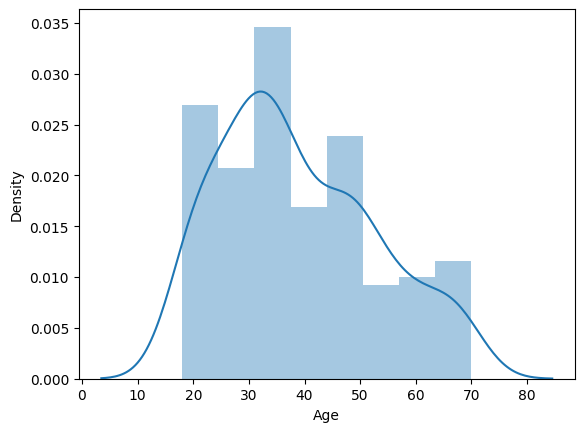

In [47]:
sea.distplot(df['Age'])

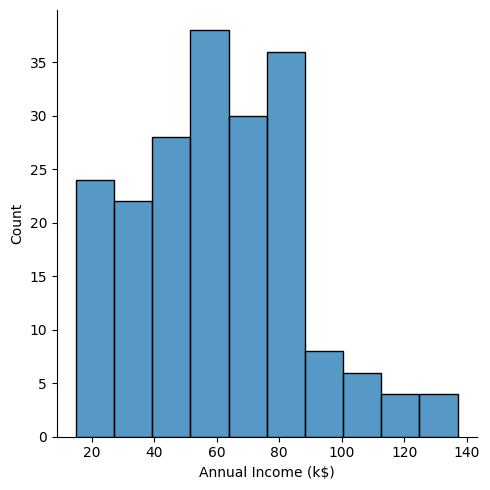

In [48]:
sea.displot(df['Annual Income (k$)'])

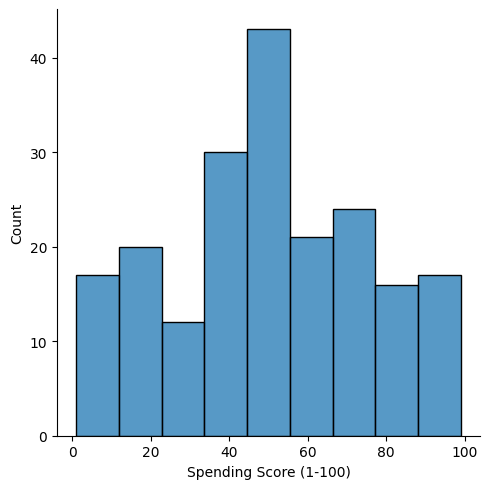

In [49]:
sea.displot(df['Spending Score (1-100)'])

Bivarent Analysis

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

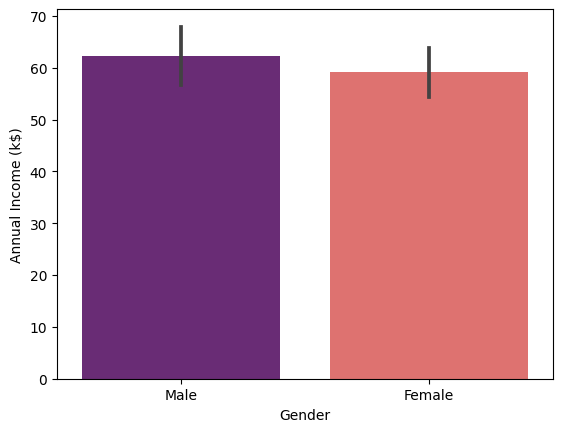

In [50]:
sea.barplot(y='Annual Income (k$)',x='Gender',data=df,palette='magma')

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

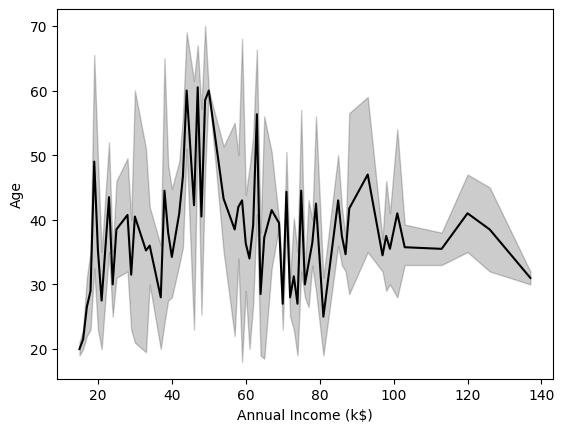

In [51]:
sea.lineplot(x='Annual Income (k$)',y='Age',data=df,color='black')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

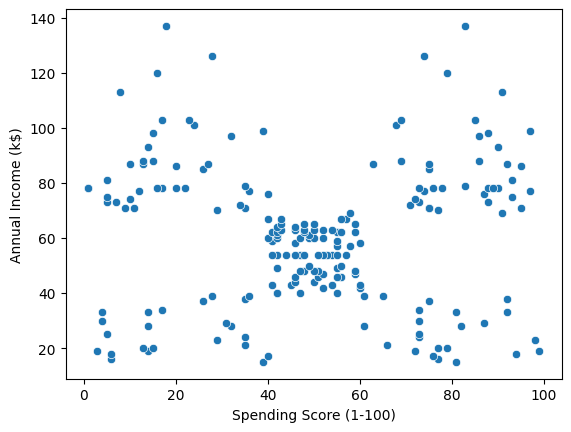

In [52]:
sea.scatterplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=df)

Multivariant analysis

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

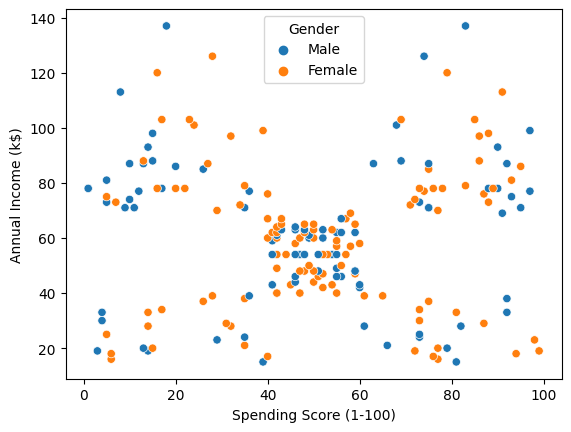

In [53]:
sea.scatterplot(x='Spending Score (1-100)',y='Annual Income (k$)',data=df,hue='Gender')

<ipython-input-54-c38365734727>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sea.heatmap(df.corr(),annot=True)


<Axes: >

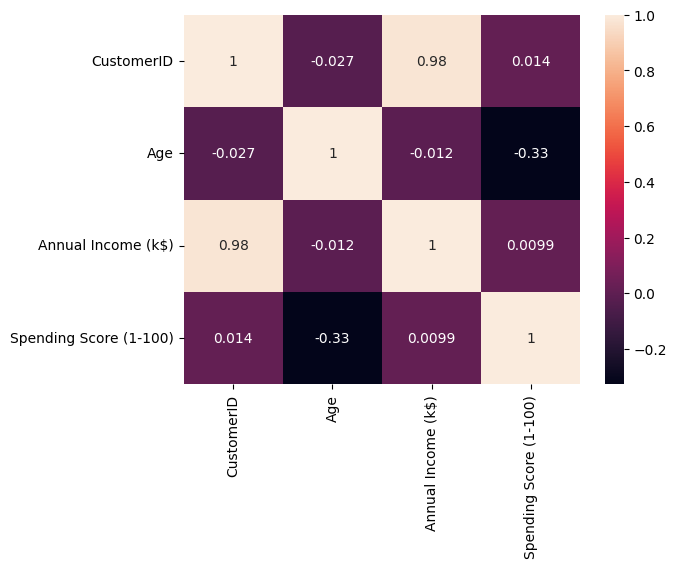

In [54]:
sea.heatmap(df.corr(),annot=True)

Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

Scalling

In [56]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df[['Annual Income (k$)','Spending Score (1-100)']] = s.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,-1.738999,-0.434801
1,2,1,21,-1.738999,1.195704
2,3,0,20,-1.700830,-1.715913
3,4,0,23,-1.700830,1.040418
4,5,0,31,-1.662660,-0.395980


Modeling

In [57]:
from sklearn import cluster

In [58]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [59]:
error

[705930.7800000001,
 205614.9505287744,
 111855.07539901718,
 78287.41622454769,
 62687.877075181525,
 52969.38455980008,
 44261.3358830776,
 37654.4623213804,
 31653.314974845423,
 28062.56356048206]

In [60]:
import matplotlib.pyplot as plt

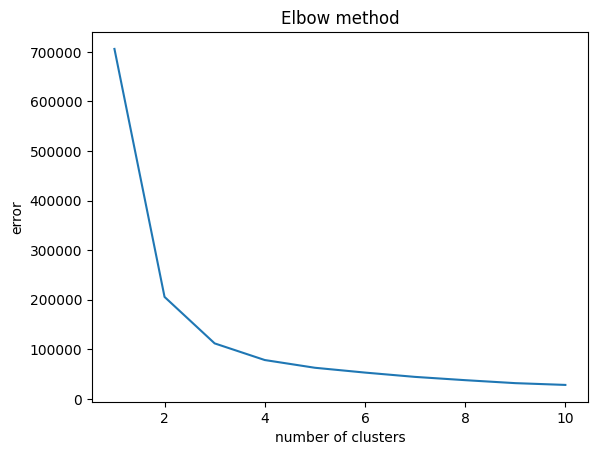

In [61]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [62]:
km_model = cluster.KMeans(n_clusters=6,init = 'k-means++',random_state=0)

In [63]:
km_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [64]:
pred = km_model.predict(df)
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 5, 1, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 5, 2, 2, 5, 2, 2, 5,
       5, 2, 2, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [65]:
copy_df['Cluster'] = pred
copy_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,-1.738999,-0.434801,3
1,2,1,21,-1.738999,1.195704,3
2,3,0,20,-1.700830,-1.715913,3
3,4,0,23,-1.700830,1.040418,3
4,5,0,31,-1.662660,-0.395980,3
...,...,...,...,...,...,...
195,196,0,35,2.268791,1.118061,0
196,197,0,45,2.497807,-0.861839,0
197,198,1,32,2.497807,0.923953,0
198,199,1,32,2.917671,-1.250054,0
